# MSDS 7331 - Data Mining

# Assignment 1 - Kickstarter Project Prediction

by: Evangelos Giakoumakis, Ramin Farhanian, Bryan Cikatz

### Business Understanding - Describe the purpose of the data set you selected:

Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity.The company's stated mission is to "help bring creative projects to life."

It helps people for gathering money from the public, circumvents traditional avenues of investment. Project creators choose a deadline and a minimum funding goal. If the goal is not met by the deadline, no funds are collected (a kind of assurance contract). The platform is open to backers from anywhere in the world.

Kickstarter applies a 5% fee on the total amount of the funds raised. Unlike many forums for fundraising or investment, Kickstarter claims no ownership over the projects and the work they produce. The web pages of projects launched on the site are permanently archived and accessible to the public.

There is no guarantee that people who post projects on Kickstarter will deliver on their projects, use the money to implement their projects, or that the completed projects will meet backers' expectations. That is the purpoe of this project. Use our analytical skills to predict if a project will be a success or a failure.


### Data Understanding - Describe the meaning and type of data for each attribute in the data file:

Our dataset can be found at: https://www.kaggle.com/kemical/kickstarter-projects/data
There are a total of 17 attributes with a total of 323,750 rows. Some of the attributes had no description or missed over 95% of their data so we decided to remove them. A few entries were not formatted correctly so a decision was made to remove them as well. In the end we ended up with 13 usable variables and 319,510 entries. 

Below is a list of all fields, their type and a short description:

Attribute           Data Type          Description 
ID                   Integer            Unique Identification number of each project.
Name                 String             Name of project.
Category             String             Category in which project falls in to.
Main_Category        String             Generalized category in which project falls in to.
Currency             String             Type of currency the project is backed up with.
Deadline            Datetime            Date and Time the project or milestone should be completed by.
Goal                 Numeric            Total money the project needs for it to be developed.
Launched            Datetime            Date and Time the project was launched.
Pledged              Numeric            Total money backers have pledged for each project.
State                String             State of each project.
Backers              Numeric            Number of people backing up each project.
Country              String             Country of origin of each project.
USD_Pledged          Numeric            Total money backers have pledged for each project in USD.

Excel was used to format dataset prior to entry to jupyter notebook due to bad condition it was in. 
Entries with missing values were removed since our set contains so many records.

Difference between Category and main_category is that the later is a standardized version of the first containing less categories.

Difference between Pledged and USD_Pledged is that the later is money pledged converted in US Dollars where as the first is money in its original state (depending on location of project.)


### Verify Data Quality

As mentioned above, there were many missing values in ou dataset. Additionally there were many format errors. All of the above were removed. No duplicates were found and no outliers were detected in our dataset.  

In [1]:
# get working directory
import os
cwd = os.getcwd()
cwd

'/notebook/DataMiningNotebooks-master'

In [3]:
# load libraries
import pandas as pd
import numpy as np
    
#load the dataset
df = pd.read_csv('data/ks-projects-201612-cleaned.csv',  sep = ',')    

In [4]:
# display first 5 rows of dataset
print (df.head())

   uniqueId                                              name   \
0      5971              An American Apocalypse: The Reckoning   
1     18520                                 Grandma's are Life   
2     21109                                               Meta   
3     21371                                  Water Powered Car   
4     24380  Puss N' Books: A relaxing cat cafe and bookstore.   

         category  main_category  currency          deadline     goal   \
0           Comics         Comics       USD    8/6/2012 20:00  48000.0   
1      World Music          Music       USD  11/18/2016 15:32  15000.0   
2  Performance Art            Art       GBP    5/6/2015 23:00    150.0   
3       Technology     Technology       USD   8/10/2016 19:02  75000.0   
4           Spaces           Food       USD  11/26/2015 17:25  20000.0   

          launched   pledged       state   backers  country   
0    6/8/2012 18:46     376.0      failed         7       US  
1  10/19/2016 15:32      62.0   

In [5]:
# display general info of dataset 
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319510 entries, 0 to 319509
Data columns (total 12 columns):
uniqueId          319510 non-null int64
name              319508 non-null object
category          319510 non-null object
main_category     319510 non-null object
currency          319510 non-null object
deadline          319510 non-null object
goal              319510 non-null float64
launched          319510 non-null object
pledged           319510 non-null float64
state             319510 non-null object
backers           319510 non-null int64
country           319510 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 29.3+ MB
None


In [6]:
# display attributes and their types
print (df.dtypes)

uniqueId            int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal              float64
launched           object
pledged           float64
state              object
backers             int64
country            object
dtype: object


In [7]:
# show 5 number summary for numeric attributes
df.describe()

,uniqueId,goal,pledged,backers
count,3.195100e+05,3.195100e+05,3.195100e+05,319510.000000
mean,1.074803e+09,4.763327e+04,8.767841e+03,102.760079
std,6.193723e+08,1.145984e+06,9.008617e+04,940.099326
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000
25%,5.374061e+08,2.000000e+03,3.000000e+01,2.000000
50%,1.075764e+09,5.000000e+03,6.100000e+02,12.000000
75%,1.611034e+09,1.500000e+04,3.939000e+03,55.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000


Column Metadata

column name                         Description                Type
uniqueID                            Id of project              String
name         Title of the project
String
category
Kickstarter sub category
String
main_category
Kickstarter main category
String
currency
Intial currency of the project
String
deadline
Project deadline
DateTime
goal
Project goal
Numeric
launched
Project launch date
DateTime
pledged
Amount pledge in inital currency
Numeric
state
Project current state
String
backers
Number of backers
Numeric
country
Country of project creator
String
usd pledged
Kickstarter conversion of pledged amount in USD
Numeric


A need to create a new variable (bl_states) was decided since state variable contains many values. New boolean variable was created below with False meaning project failure and True success.

In [8]:
# load libraries
import numpy as np
import copy

# create state boolean so we can see the percentage of success/failures
df['bl_states'] = df['state ']
df['bl_states'] = df['bl_states'].replace(to_replace='failed',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='canceled',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='suspended',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='successful',value=True)
df['bl_states'] = df['bl_states'].replace(to_replace='live',value=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319510 entries, 0 to 319509
Data columns (total 13 columns):
uniqueId          319510 non-null int64
name              319508 non-null object
category          319510 non-null object
main_category     319510 non-null object
currency          319510 non-null object
deadline          319510 non-null object
goal              319510 non-null float64
launched          319510 non-null object
pledged           319510 non-null float64
state             319510 non-null object
backers           319510 non-null int64
country           319510 non-null object
bl_states         319510 non-null bool
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 29.6+ MB


,uniqueId,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,bl_states
0,5971,An American Apocalypse: The Reckoning,Comics,Comics,USD,8/6/2012 20:00,48000.0,6/8/2012 18:46,376.0,failed,7,US,False
1,18520,Grandma's are Life,World Music,Music,USD,11/18/2016 15:32,15000.0,10/19/2016 15:32,62.0,failed,4,US,False
2,21109,Meta,Performance Art,Art,GBP,5/6/2015 23:00,150.0,4/8/2015 0:37,173.0,successful,11,GB,True
3,21371,Water Powered Car,Technology,Technology,USD,8/10/2016 19:02,75000.0,7/26/2016 19:02,120.0,failed,4,US,False
4,24380,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,USD,11/26/2015 17:25,20000.0,10/27/2015 16:25,776.0,failed,18,US,False


In [13]:
#looking at projects based upon state of success
bl_states_list = df.groupby('bl_states').count()
del bl_states_list['name ']
del bl_states_list['category ']
del bl_states_list['main_category ']
del bl_states_list['deadline ']
del bl_states_list['currency ']
del bl_states_list['goal ']
del bl_states_list['launched ']
del bl_states_list['pledged ']
del bl_states_list['backers ']
del bl_states_list['country ']
del bl_states_list['state ']

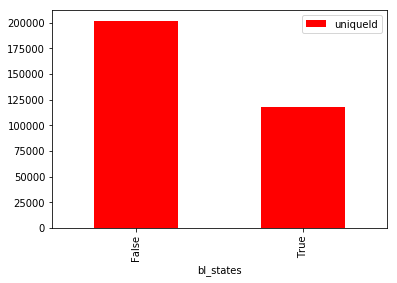

In [18]:
# plot something
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.figure(); 
bl_states_list.plot(kind='bar', color='r');